In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [214]:
# Loading MNIST dataset
mnist_dataset = tf.keras.datasets.mnist.load_data()
print("The type of data : ",type(mnist_dataset))
print("Shape of 1st element of tuple : ", mnist_dataset[0][0].shape)
print("Shape of 2nd element of tuple : ", mnist_dataset[1][0].shape)

The type of data :  <class 'tuple'>
Shape of 1st element of tuple :  (60000, 28, 28)
Shape of 2nd element of tuple :  (10000, 28, 28)


### Some conclusions from the above cell

1. The load_data() will give us a tuple of 2 tuples. The first tuple consists of 60000 hand written digits and second tuple consists 10000 hand written digits.   
2.   In each of two tuple, the second element is a array of target labels.




#### To display, plt.imshow() can be used.

The digit 5 is : 


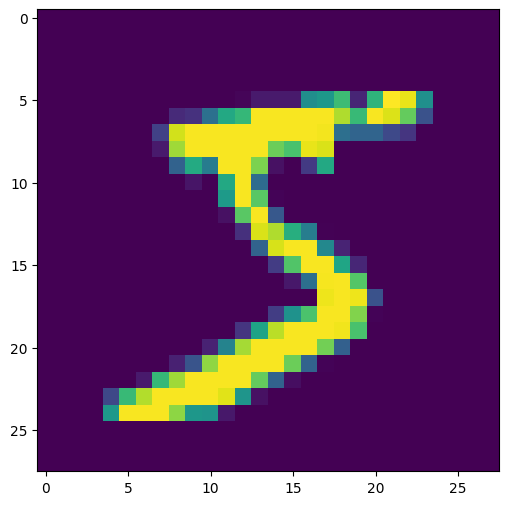

In [215]:
# sample hand written digit using imshow
plt.figure(figsize=(6,6))
print("The digit {place_holder} is : ".format(place_holder = mnist_dataset[0][1][0]))
plt.imshow(mnist_dataset[0][0][0])

The following tasks needs to be done.


1.   Each 28 X 28 2D array needs to be converted into single row in which each of 28 rows is appened one after the other contigiously so that each row will be having 784 elements
2.   After this create a dataFrame with each converted row maps to label. Do this just for practice though it is not required for custom PCA



In [216]:
# Converting each of 28 X 28 2D array into a single row 784 dimensions
data = np.append(mnist_dataset[0][0].reshape(60000,28*28),mnist_dataset[1][0].reshape(10000,28*28),axis=0)
print("Shape of the final data : {}".format(data.shape))
print("Sample row of converted data : {}".format(data))

Shape of the final data : (70000, 784)
Sample row of converted data : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [217]:
# Creating a dataFrame from the above data
dataFrame = pd.DataFrame(data)
dataFrame["target"] = np.append(mnist_dataset[0][1],mnist_dataset[1][1])
dataFrame.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


#### Next steps:


1.   Standardize each and every feature such that mean of the feature is 0 and standard deviation is 1 i.e, use standard normal variate or standard scaler.
2.   Find the covariance matrix 'C' of the matrix which we got after standardization.
3.   Find the eigen vectors of the covariance matrix.
4.   Find out the top 2 eigen values and its corresponsing vectors which is nothing but the direction of preserving maximum variance.
5.   Draw 2D scatter plot using matplotlib or seaborn to visualize the data


#### Applying standard scaling using scikitlearn

In [218]:
from sklearn.preprocessing import StandardScaler
# Intialise standard scaler
standardScaler = StandardScaler()
# Fit the data
standardScaler.fit(data)
# print("Mean of the data = ",scaler.mean_)
# print("Variance of the data = ",scaler.var_)
# Transform the data
data = standardScaler.transform(data)

In [219]:
# Find the covariance matrix
cov_mat = np.cov(data.transpose())
# verify the shape of the covariance matrix to be feature X feature
print("Shape of the covariance matrix : ",cov_mat.shape)

Shape of the covariance matrix :  (784, 784)


In [230]:
# Find out the eigen values and eigen vectors of covariance matrix
eigenValues, eigenVectors = np.linalg.eig(cov_mat)
print("Shape of the eigen values : ",eigenValues.shape)
print("Shape of the eigen vectors : ",eigenVectors.shape)
eigenValues

Shape of the eigen values :  (784,)
Shape of the eigen vectors :  (784, 784)


array([ 4.05717285e+01,  2.90568291e+01,  2.68785692e+01,  2.08009648e+01,
        1.81244641e+01,  1.57646528e+01,  1.37638842e+01,  1.25156954e+01,
        1.10169049e+01,  1.00380057e+01,  9.65037627e+00,  8.63834298e+00,
        8.00950033e+00,  7.84139416e+00,  7.39132242e+00,  7.15382734e+00,
        6.69582232e+00,  6.61226831e+00,  6.38912392e+00,  6.20646328e+00,
        5.90840528e+00,  5.74069722e+00,  5.48297738e+00,  5.33732321e+00,
        5.15221035e+00,  4.95623838e+00,  4.89932919e+00,  4.70655246e+00,
        4.51030375e+00,  4.38844572e+00,  4.29436653e+00,  4.23715539e+00,
        4.07936583e+00,  4.02183857e+00,  3.97233838e+00,  3.84270332e+00,
        3.79345098e+00,  3.70895102e+00,  3.63458298e+00,  3.43282671e+00,
        3.42473228e+00,  3.34451105e+00,  3.26038307e+00,  3.20503935e+00,
        3.18027237e+00,  3.14418625e+00,  3.14838269e+00,  3.07537728e+00,
        3.05441235e+00,  3.00923043e+00,  2.90522929e+00,  2.84913789e+00,
        2.82697237e+00,  

In [229]:
# Find out the top 2 eigen values and its corresponding vectors
tuples_eigen = list()
for i in range(eigenValues.shape[0]):
  tuples_eigen.append((eigenValues[i],eigenVectors[:, i]))
tuples_eigen.sort(key=lambda i : i[0], reverse=True)
print("Top two eigen values : {}, {}".format(tuples_eigen[0][0], tuples_eigen[1][0]))
print("Top two eigen vectors : {}, {}".format(tuples_eigen[0][1], tuples_eigen[1][1]))

Top two eigen values : 40.57172850595764, 29.0568291471605
Top two eigen vectors : [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.51292771e-05  2.32667612e-05  1.51778162e-04  1.51778162e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.77308025e-04  4.01053152e-04  9.45787480e-04  1.76805224e-03
  2.69615204e-03  3.82318360e-03  4.18475826e-03  3.73515005e-03
  2.91445097e-03  2.58060183e-03  2.68724355e-03  1.96489041e-03
  1.13379094e-03  7.30771056e-04  5.26037564e-04  6.00290502e-05
 -4.24210221e-05  3.90855771e-04  2.49606377e-04 -2.47704968e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.000

Note: The much easier way to get indexes of first 2 maximum elements is to use np.argsort(). This will give indices according to ascending order of sorting. Take the two indices from the last

In [243]:
# Taking top two features and clubbing them together.
top_2_features = np.array([tuples_eigen[0][1], tuples_eigen[1][1]]).transpose()
top_2_features

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [244]:
# Calculate datapoints when projected on to top 2 features
data_projected = data.dot(top_2_features)
data_projected.shape

(70000, 2)

Note: np.dot() will perform row X column matrix multiplication if arrays supplied to it are 2 dimensional

In [246]:
# Create a dataframe with projected data
dataFrame_projected = pd.DataFrame(data_projected)
dataFrame_projected["target"] = dataFrame["target"]
dataFrame_projected.head()

,0,1,target
0,-0.891720,4.929711,5
1,8.813530,7.517560,0
2,2.204835,-9.824461,4
3,-6.534627,4.029669,1
4,-5.251618,-3.278848,9


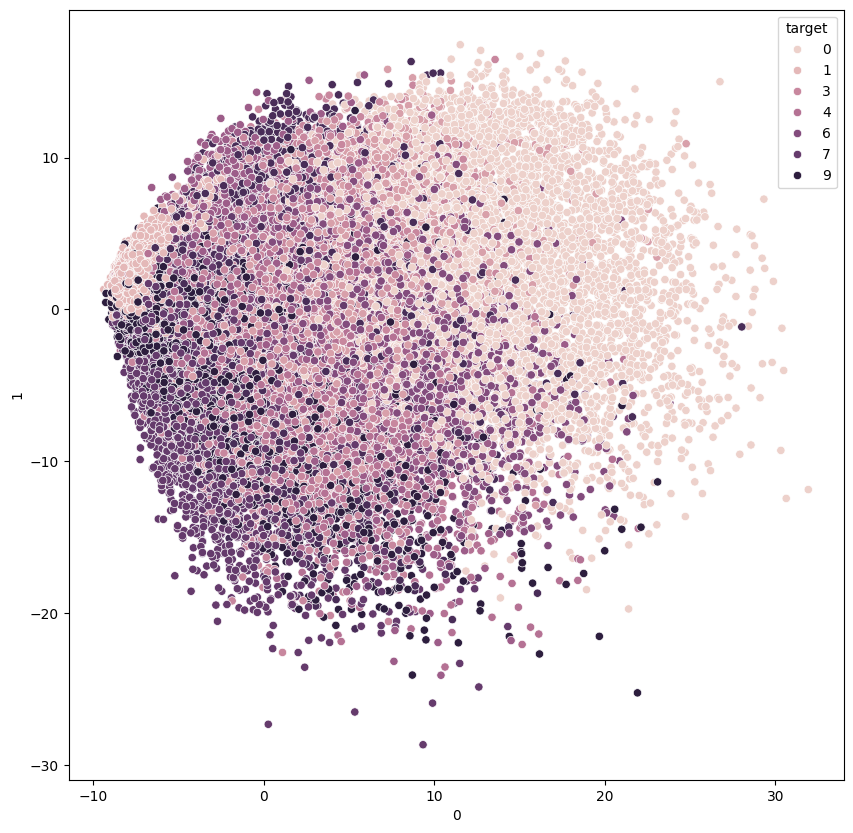

In [247]:
# plot scatter plot of above points using hue as target
plt.figure(figsize=(10,10))
sns.scatterplot(x=dataFrame_projected[0], y=dataFrame_projected[1], hue=dataFrame_projected["target"])
plt.show()

Note: You can eventually use scikit learns PCA to get above result